In [1]:
%load_ext autoreload
# Always reload modules so that as you change code in src, it gets loaded
%autoreload 2
%matplotlib inline

import networkx as nx
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
import pandas as pd
import numpy as np
import random
import math
import EoN
import seaborn as sns
import time

# New Imports
#from ctrace.contact_tracing import *
#from ctrace.constraint import *
#from ctrace.solve import *
#from ctrace.simulation import *
#from ctrace.restricted import *
from ctrace.simulation import *
from ctrace.dataset import *
from ctrace.recommender import *
from ctrace.problem_label import *
from ctrace.utils import *

## BUDGET SENSITIVITY

In [2]:
df_mont = pd.read_csv(PROJECT_ROOT / "output" / "run_XkskM" / "results.csv")
df_cville = pd.read_csv(PROJECT_ROOT / "output" / "run_mdioi" / "results.csv")
df_mont_edges = pd.read_csv(PROJECT_ROOT / "output" / "run_B7UWt" / "results.csv")
df_cville_edges = pd.read_csv(PROJECT_ROOT / "output" / "run_8Etcs" / "results.csv")
df_cville_edges = pd.concat([pd.read_csv(PROJECT_ROOT / "output" / "run_MGy75" / "results.csv"), df_cville_edges[df_cville_edges["budget"]<1800]])
df_cville_edges = pd.concat([pd.read_csv(PROJECT_ROOT / "output" / "run_BJbPL" / "results.csv"), df_cville_edges[df_cville_edges["budget"]<2100]])

df_mont = df_mont.replace({'Random':'Random Sol', 'EC':'Eigenvector Centrality', 'DepRound2_comp':'DepRound', 'DegGreedy2_comp':'DegGreedy'})
df_cville = df_cville.replace({'Random':'Random Sol', 'EC':'Eigenvector Centrality', 'DepRound2_comp':'DepRound', 'DegGreedy2_comp':'DegGreedy'})
df_mont_edges = df_mont_edges.replace({'Random':'Random Sol', 'EC':'Eigenvector Centrality', 'DepRound2_comp':'DepRound', 'DegGreedy2_comp':'DegGreedy'})
df_cville_edges = df_cville_edges.replace({'Random':'Random Sol', 'EC':'Eigenvector Centrality', 'DepRound2_fair':'DepRound', 'DegGreedy2_fair':'DegGreedy', 'DepRound2_comp':'DepRound', 'DegGreedy2_comp':'DegGreedy'})

df_mont = df_mont.rename(columns={"agent":"Alg for MinExposed"})
df_cville = df_cville.rename(columns={"agent":"Alg for MinExposed"})
df_mont_edges = df_mont_edges.rename(columns={"agent":"Alg for MinExposed"})
df_cville_edges = df_cville_edges.rename(columns={"agent":"Alg for MinExposed"})

df_mont['infected'] = 100.0*df_mont['infection_count']/75457
df_cville['infected'] = 100.0*df_cville['infection_count']/131219
df_mont_edges['infected'] = 100.0*df_mont_edges['infection_count']/75457
df_cville_edges['infected'] = 100.0*df_cville_edges['infection_count']/131219
 
df_mont = pd.concat([df_mont[df_mont["Alg for MinExposed"] == "Random Sol"], df_mont[df_mont["Alg for MinExposed"] == "Eigenvector Centrality"], 
                     df_mont[df_mont["Alg for MinExposed"] == "DepRound"], df_mont[df_mont["Alg for MinExposed"] == "DegGreedy"]])
df_cville = pd.concat([df_cville[df_cville["Alg for MinExposed"] == "Random Sol"], df_cville[df_cville["Alg for MinExposed"] == "Eigenvector Centrality"], 
                     df_cville[df_cville["Alg for MinExposed"] == "DepRound"], df_cville[df_cville["Alg for MinExposed"] == "DegGreedy"]])
df_mont_edges = pd.concat([df_mont_edges[df_mont_edges["Alg for MinExposed"] == "Random Sol"], df_mont_edges[df_mont_edges["Alg for MinExposed"] == "Eigenvector Centrality"], 
                     df_mont_edges[df_mont_edges["Alg for MinExposed"] == "DepRound"], df_mont_edges[df_mont_edges["Alg for MinExposed"] == "DegGreedy"]])
df_cville_edges = pd.concat([df_cville_edges[df_cville_edges["Alg for MinExposed"] == "Random Sol"], df_cville_edges[df_cville_edges["Alg for MinExposed"] == "Eigenvector Centrality"], 
                     df_cville_edges[df_cville_edges["Alg for MinExposed"] == "DepRound"], df_cville_edges[df_cville_edges["Alg for MinExposed"] == "DegGreedy"]])

#-----------------------------------------------

df_mont_none = pd.read_csv(PROJECT_ROOT / "output" / "run_mxQWk" / "results.csv").rename(columns={"agent":"Alg for MinExposed"})
df_mont_none['infected'] = 100.0*df_mont_none['infection_count']/75457

df_cville_none = pd.read_csv(PROJECT_ROOT / "output" / "run_NyqJq" / "results.csv").rename(columns={"agent":"Alg for MinExposed"})
df_cville_none['infected'] = 100.0*df_cville_none['infection_count']/131219

df_mont_extra_none = pd.read_csv(PROJECT_ROOT / "output" / "run_imWiw" / "results.csv").rename(columns={"agent":"Alg for MinExposed"})
df_mont_extra_none['infected'] = 100.0*df_mont_extra_none['infection_count']/75457

df_cville_extra_none = pd.read_csv(PROJECT_ROOT / "output" / "run_WyrGF" / "results.csv").rename(columns={"agent":"Alg for MinExposed"})
df_cville_extra_none['infected'] = 100.0*df_cville_extra_none['infection_count']/131219

#df_mont_extra_none["infection_list"] = df_mont_none["infections_step"].apply(lambda x: [int(i) for i in x.strip("[]").split(", ")])
#df_mont_extra_none["time_steps"] = df_mont_none["infection_list"].apply(lambda x: len(x))
#df_mont_extra_none["time_step_peak"] = df_mont_none["infection_list"].apply(lambda x: x.index(max(x)))
#df_mont_extra_none["peak"] = df_mont_none["infection_list"].apply(lambda x: max(x))
#average_nointervention_peak = df_mont_none['peak'].mean()

#a = df_mont.iloc[[0,1],:].copy()

#average over 10 then plug in and hardcode

df_mont = pd.concat([df_mont, df_mont_none]).reset_index()

#-----------------------------------------------------------------------------

df_cville = pd.concat([df_cville, df_cville_none]).reset_index()

#--------------------------------------------------------------------------------

df_mont_edges = pd.concat([df_mont_edges, df_mont_extra_none]).reset_index()

#--------------------------------------------------------------------------------

df_cville_edges = pd.concat([df_cville_edges, df_cville_extra_none]).reset_index()

#----------------------------------------------------------------------------------

df_mont["infection_list"] = df_mont["infections_step"].apply(lambda x: [int(i) for i in x.strip("[]").split(", ")])
df_mont["time_steps"] = df_mont["infection_list"].apply(lambda x: len(x))
df_mont["time_step_peak"] = df_mont["infection_list"].apply(lambda x: x.index(max(x)))
df_mont["peak"] = df_mont["infection_list"].apply(lambda x: max(x))
df_mont["peak"] = 100.0*df_mont["peak"]/75457

df_cville["infection_list"] = df_cville["infections_step"].apply(lambda x: [int(i) for i in x.strip("[]").split(", ")])
df_cville["time_steps"] = df_cville["infection_list"].apply(lambda x: len(x))
df_cville["time_step_peak"] = df_cville["infection_list"].apply(lambda x: x.index(max(x)))
df_cville["peak"] = df_cville["infection_list"].apply(lambda x: max(x))
df_cville["peak"] = 100.0*df_cville["peak"]/131219

df_mont_edges["infection_list"] = df_mont_edges["infections_step"].apply(lambda x: [int(i) for i in x.strip("[]").split(", ")])
df_mont_edges["time_steps"] = df_mont_edges["infection_list"].apply(lambda x: len(x))
df_mont_edges["time_step_peak"] = df_mont_edges["infection_list"].apply(lambda x: x.index(max(x)))
df_mont_edges["peak"] = df_mont_edges["infection_list"].apply(lambda x: max(x))
df_mont_edges["peak"] = 100.0*df_mont_edges["peak"]/75457

df_cville_edges["infection_list"] = df_cville_edges["infections_step"].apply(lambda x: [int(i) for i in x.strip("[]").split(", ")])
df_cville_edges["time_steps"] = df_cville_edges["infection_list"].apply(lambda x: len(x))
df_cville_edges["time_step_peak"] = df_cville_edges["infection_list"].apply(lambda x: x.index(max(x)))
df_cville_edges["peak"] = df_cville_edges["infection_list"].apply(lambda x: max(x))
df_cville_edges["peak"] = 100.0*df_cville_edges["peak"]/131219

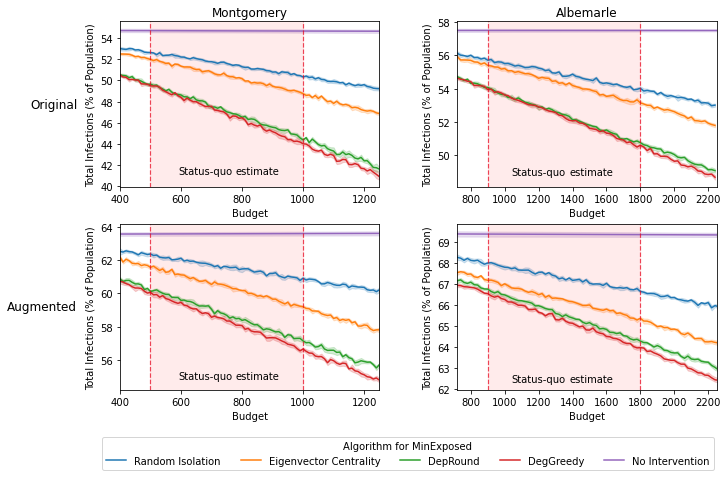

In [4]:
fig, ax = plt.subplots(2,2,figsize=(10,6))

import seaborn as sns

ax0 = sns.lineplot(data=df_mont, x="budget", y="infected", hue="Alg for MinExposed", ax= ax[0, 0])
ax0.get_legend().remove()
ax[0, 0].set_xlabel("Budget")
ax[0, 0].set_ylabel("Total Infections (% of Population)")
ax[0, 0].axvline(x=500, linewidth=1.2, color=(0.9,0,0.1, 0.7),linestyle='--')
ax[0, 0].axvline(x=1000, linewidth=1.2, color=(0.9,0,0.1, 0.7),linestyle='--')
ax[0, 0].text(680, 41.5, 'Status-quo', fontsize=10,verticalalignment='center', horizontalalignment='center')
ax[0, 0].text(850, 41.5, 'estimate', fontsize=10,verticalalignment='center', horizontalalignment='center')
ax[0, 0].axvspan(500, 1000, alpha=0.08, color='red')
ax[0, 0].set_xlim(400,1250)
#ax[0, 0].set_ylim(40,56)

ax1 = sns.lineplot(data=df_cville, x="budget", y="infected", hue="Alg for MinExposed", ax= ax[0, 1])
ax1.get_legend().remove()
ax[0, 1].set_xlabel("Budget")
ax[0, 1].set_ylabel("Total Infections (% of Population)")
ax[0, 1].axvline(x=900, linewidth=1.2, color=(0.9,0,0.1, 0.7),linestyle='--')
ax[0, 1].axvline(x=1800, linewidth=1.2, color=(0.9,0,0.1, 0.7),linestyle='--')
ax[0, 1].text(1200, 49, 'Status-quo', fontsize=10,verticalalignment='center', horizontalalignment='center')
ax[0, 1].text(1510, 49, 'estimate', fontsize=10,verticalalignment='center', horizontalalignment='center')
ax[0, 1].axvspan(900, 1800, alpha=0.08, color='red')
ax[0, 1].set_xlim(720, 2250)
#ax[0, 1].set_ylim(45,60)

ax3 = sns.lineplot(data=df_mont_edges, x="budget", y="infected", hue="Alg for MinExposed", ax= ax[1, 0])
ax3.get_legend().remove()
ax[1, 0].set_xlabel("Budget")
ax[1, 0].set_ylabel("Total Infections (% of Population)")
ax[1, 0].axvline(x=500, linewidth=1.2, color=(0.9,0,0.1, 0.7),linestyle='--')
ax[1, 0].axvline(x=1000, linewidth=1.2, color=(0.9,0,0.1, 0.7),linestyle='--')
ax[1, 0].text(680, 55, 'Status-quo', fontsize=10,verticalalignment='center', horizontalalignment='center')
ax[1, 0].text(850, 55, 'estimate', fontsize=10,verticalalignment='center', horizontalalignment='center')
ax[1, 0].axvspan(500, 1000, alpha=0.08, color='red')
ax[1, 0].set_xlim(400,1250)
#ax[1, 0].set_ylim(50,65)

ax4 = sns.lineplot(data=df_cville_edges, x="budget", y="infected", hue="Alg for MinExposed", ax=ax[1, 1])
ax4.get_legend().remove()
ax[1, 1].set_xlabel("Budget")
ax[1, 1].set_ylabel("Total Infections (% of Population)")
ax[1, 1].axvline(x=900, linewidth=1.2, color=(0.9,0,0.1, 0.7),linestyle='--')
ax[1, 1].axvline(x=1800, linewidth=1.2, color=(0.9,0,0.1, 0.7),linestyle='--')
ax[1, 1].text(1200, 62.5, 'Status-quo', fontsize=10,verticalalignment='center', horizontalalignment='center')
ax[1, 1].text(1510, 62.5, 'estimate', fontsize=10,verticalalignment='center', horizontalalignment='center')
ax[1, 1].axvspan(900, 1800, alpha=0.08, color='red')
ax[1, 1].set_xlim(720, 2250)
#ax[1, 1].set_ylim(50,70)

fig.legend(['Random Isolation','Eigenvector Centrality','DepRound','DegGreedy','No Intervention'],title='Algorithm for MinExposed',loc = "lower center", ncol = 5, bbox_to_anchor = (0.55, -0.1), prop={'size':10})

pad = 5 # in points

ax[0, 0].annotate("Montgomery", xy=(0.5, 1), xytext=(0, pad), xycoords='axes fraction', textcoords='offset points', size='large', ha='center', va='baseline')
ax[0, 1].annotate("Albemarle", xy=(0.5, 1), xytext=(0, pad), xycoords='axes fraction', textcoords='offset points', size='large', ha='center', va='baseline')

ax[0, 0].annotate("Original", xy=(0, 0.5), xytext=(-ax[0, 0].yaxis.labelpad - pad, 0), xycoords= ax[0, 0].yaxis.label, textcoords='offset points', size='large', ha='right', va='center')
ax[1, 0].annotate("Augmented", xy=(0, 0.5), xytext=(-ax[1, 0].yaxis.labelpad - pad, 0), xycoords= ax[1, 0].yaxis.label, textcoords='offset points', size='large', ha='right', va='center')

fig.tight_layout()

fig.subplots_adjust(left=0.15, top=0.95)
plt.subplots_adjust(wspace = 0.3, hspace = 0.22)

#fig.savefig("../output/plots/combined_total_infection.png", dpi=300, bbox_inches = 'tight')
plt.show()

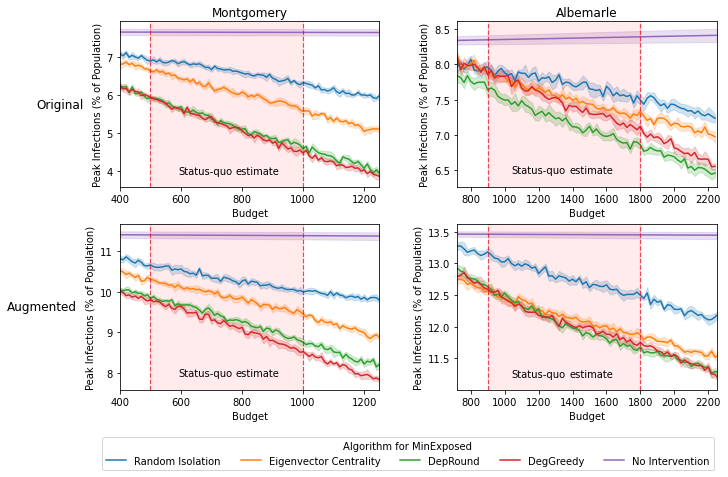

In [3]:
fig, ax = plt.subplots(2,2,figsize=(10,6))
import seaborn as sns

ax0 = sns.lineplot(data=df_mont, x="budget", y="peak", hue="Alg for MinExposed", ax= ax[0, 0])
ax0.get_legend().remove()
ax[0, 0].set_xlabel("Budget")
ax[0, 0].set_ylabel("Peak Infections (% of Population)")
ax[0, 0].axvline(x=500, linewidth=1.2, color=(0.9,0,0.1, 0.7),linestyle='--')
ax[0, 0].axvline(x=1000, linewidth=1.2, color=(0.9,0,0.1, 0.7),linestyle='--')
ax[0, 0].text(680, 4, 'Status-quo', fontsize=10,verticalalignment='center', horizontalalignment='center')
ax[0, 0].text(850, 4, 'estimate', fontsize=10,verticalalignment='center', horizontalalignment='center')
ax[0, 0].axvspan(500, 1000, alpha=0.08, color='red')
ax[0, 0].set_xlim(400,1250)
#ax[0, 0].set_ylim(40,56)

ax1 = sns.lineplot(data=df_cville, x="budget", y="peak", hue="Alg for MinExposed", ax= ax[0, 1])
ax1.get_legend().remove()
ax[0, 1].set_xlabel("Budget")
ax[0, 1].set_ylabel("Peak Infections (% of Population)")
ax[0, 1].axvline(x=900, linewidth=1.2, color=(0.9,0,0.1, 0.7),linestyle='--')
ax[0, 1].axvline(x=1800, linewidth=1.2, color=(0.9,0,0.1, 0.7),linestyle='--')
ax[0, 1].text(1200, 6.5, 'Status-quo', fontsize=10,verticalalignment='center', horizontalalignment='center')
ax[0, 1].text(1510, 6.5, 'estimate', fontsize=10,verticalalignment='center', horizontalalignment='center')
ax[0, 1].axvspan(900, 1800, alpha=0.08, color='red')
ax[0, 1].set_xlim(720, 2250)
#ax[0, 1].set_ylim(45,60)

ax3 = sns.lineplot(data=df_mont_edges, x="budget", y="peak", hue="Alg for MinExposed", ax= ax[1, 0])
ax3.get_legend().remove()
ax[1, 0].set_xlabel("Budget")
ax[1, 0].set_ylabel("Peak Infections (% of Population)")
ax[1, 0].axvline(x=500, linewidth=1.2, color=(0.9,0,0.1, 0.7),linestyle='--')
ax[1, 0].axvline(x=1000, linewidth=1.2, color=(0.9,0,0.1, 0.7),linestyle='--')
ax[1, 0].text(680, 8, 'Status-quo', fontsize=10,verticalalignment='center', horizontalalignment='center')
ax[1, 0].text(850, 8, 'estimate', fontsize=10,verticalalignment='center', horizontalalignment='center')
ax[1, 0].axvspan(500, 1000, alpha=0.08, color='red')
ax[1, 0].set_xlim(400,1250)
#ax[1, 0].set_ylim(50,65)

ax4 = sns.lineplot(data=df_cville_edges, x="budget", y="peak", hue="Alg for MinExposed", ax=ax[1, 1])
ax4.get_legend().remove()
ax[1, 1].set_xlabel("Budget")
ax[1, 1].set_ylabel("Peak Infections (% of Population)")
ax[1, 1].axvline(x=900, linewidth=1.2, color=(0.9,0,0.1, 0.7),linestyle='--')
ax[1, 1].axvline(x=1800, linewidth=1.2, color=(0.9,0,0.1, 0.7),linestyle='--')
ax[1, 1].text(1200, 11.25, 'Status-quo', fontsize=10,verticalalignment='center', horizontalalignment='center')
ax[1, 1].text(1510, 11.25, 'estimate', fontsize=10,verticalalignment='center', horizontalalignment='center')
ax[1, 1].axvspan(900, 1800, alpha=0.08, color='red')
ax[1, 1].set_xlim(720, 2250)
#ax[1, 1].set_ylim(50,70)

fig.legend(['Random Isolation','Eigenvector Centrality','DepRound','DegGreedy','No Intervention'],title='Algorithm for MinExposed',loc = "lower center", ncol = 5, bbox_to_anchor = (0.55, -0.1), prop={'size':10})

pad = 5 # in points

ax[0, 0].annotate("Montgomery", xy=(0.5, 1), xytext=(0, pad), xycoords='axes fraction', textcoords='offset points', size='large', ha='center', va='baseline')
ax[0, 1].annotate("Albemarle", xy=(0.5, 1), xytext=(0, pad), xycoords='axes fraction', textcoords='offset points', size='large', ha='center', va='baseline')

ax[0, 0].annotate("Original", xy=(0, 0.5), xytext=(-ax[0, 0].yaxis.labelpad - pad, 0), xycoords= ax[0, 0].yaxis.label, textcoords='offset points', size='large', ha='right', va='center')
ax[1, 0].annotate("Augmented", xy=(0, 0.5), xytext=(-ax[1, 0].yaxis.labelpad - pad, 0), xycoords= ax[1, 0].yaxis.label, textcoords='offset points', size='large', ha='right', va='center')

fig.tight_layout()
# tight_layout doesn't take these labels into account. We'll need 
# to make some room. These numbers are are manually tweaked. 
# You could automatically calculate them, but it's a pain.
fig.subplots_adjust(left=0.15, top=0.95)
plt.subplots_adjust(wspace = 0.3, hspace = 0.22)
#fig.savefig("../output/plots/combined_peak_infection.png", dpi=300, bbox_inches = 'tight')
plt.show()

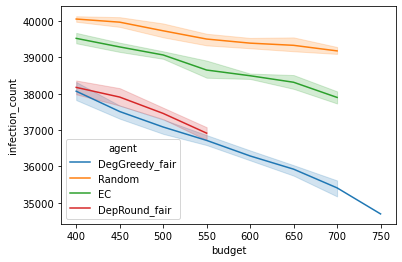

In [20]:
df = pd.read_csv(PROJECT_ROOT / "output" / "run_F6xu5" / "results.csv")
import seaborn as sns
sns.lineplot(data = df, x = "budget", y ="infection_count", hue = "agent")
plt.show()

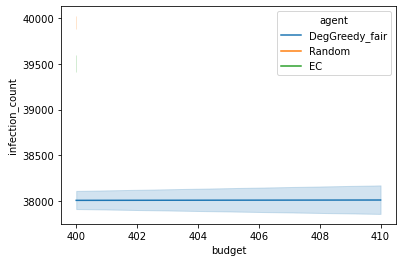

In [19]:
df = pd.read_csv(PROJECT_ROOT / "output" / "run_XK2Wx" / "results.csv")
import seaborn as sns
sns.lineplot(data = df, x = "budget", y ="infection_count", hue = "agent")
plt.show()

## COMPLIANCE SENSITIVITY

In [13]:
G = load_graph_montgomery_labels()

with open(PROJECT_ROOT / "data" / "SIR_Cache" / "c7.json", 'r') as infile:
            j = json.load(infile)
            (S, I1, I2, R) = (j["S"], j["I1"], j["I2"], j["R"])
            infections = j["infections"]

state = InfectionState(G, (S, I1, I2, R), 1000, "none", 0.05, True, 1, True, 1, 1)

while len(state.SIR.I2) + len(state.SIR.I1)!=0:
    state.step(DepRound_fair(state))
    print(len(state.SIR.R))

341
610
1081
1550
2135
2894
3803
4930
6427
8216
10354
12862
15708
18687
21571
24164
26386
28250
29590
30595
31254
31650
31855
31993
32045
32068
32082
32085
32089
32090
32091
